In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests

plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   'text.usetex': False,
   }
plt.rcParams.update(params)

# use to print progress bar
import time, sys
from IPython.display import clear_output
def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

# Get currency data

In [23]:
api_url_base = 'https://api.worldtradingdata.com/api/v1/forex_history'
para = {'api_token':'RDwtqK6BxhB0S3hU6tkYbLhuqI58fIeJs3GbrkOA5afzVSjtGEP1cHBJjNd3',
        'base': 'USD','convert_to': 'GBP'}

def get_account_info():

    response = requests.get(api_url_base, params=para)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None

In [31]:
jons=get_account_info()

In [62]:
usd=pd.DataFrame.from_dict(jons)
usd=usd.reset_index()

In [66]:
usd['date']= [int(i.split('-')[0]+i.split('-')[1]+i.split('-')[2]) for i in usd['index']]

# Get covid data

In [36]:
api_url_base = 'https://covidtracking.com/api/v1/us/daily.json'
para={}

jons_covid=get_account_info()

In [74]:
covidcase=pd.DataFrame.from_dict(jons_covid)
covidcase['positive']=[np.int(i) for i in covidcase['positive']]

# merge these two data

In [121]:
merg_df=pd.merge(usd,covidcase,left_on='date',right_on='date',how='inner')
#merg_df=pd.merge(merg_df,covidcase_uk,left_on='date',right_on='date',how='inner')

merg_df=merg_df.dropna(subset=['history','positive'])
merg_df['history']=[float(i) for i in merg_df['history']]
merg_df

,index,symbol,history,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,2020-01-22,USDGBP,0.760815,20200122,1,1,NaN,NaN,NaN,NaN,...,2020-01-22T00:00:00Z,1,1,1,0,0,0,0,0,615132d06fd9e22bc21b1b3ec47fb9b2a0de0734
1,2020-01-23,USDGBP,0.762300,20200123,1,1,NaN,NaN,NaN,NaN,...,2020-01-23T00:00:00Z,1,1,1,0,0,0,0,0,680d664781c7080c1171f160145dafc31e3b93af
2,2020-01-24,USDGBP,0.764865,20200124,1,1,NaN,NaN,NaN,NaN,...,2020-01-24T00:00:00Z,1,1,1,0,0,0,0,0,738e6d4a52f6d0895318ad9eda0d965d09feeb70
3,2020-01-25,USDGBP,0.764868,20200125,1,1,NaN,NaN,NaN,NaN,...,2020-01-25T00:00:00Z,1,1,1,0,0,0,0,0,ca2013db2fa6a2b1a2c776b85d5fcd5e1ca64722
4,2020-01-26,USDGBP,0.765615,20200126,1,1,NaN,NaN,NaN,NaN,...,2020-01-26T00:00:00Z,1,1,1,0,0,0,0,0,defee0e146ae049c86c14a5e580c6219add8e92f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2020-03-31,USDGBP,0.806000,20200331,56,190884,894241.0,59518.0,17856.0,23191.0,...,2020-03-31T00:00:00Z,1144643,1085125,1085125,817,3850,86597,24474,111071,574807d94eb124baa919ee211b1b731d10f3b7f0
70,2020-04-01,USDGBP,0.807700,20200401,56,216029,976679.0,59665.0,19982.0,27371.0,...,2020-04-01T00:00:00Z,1252373,1192708,1192708,946,4180,82438,25145,107583,19247a78c10fcd5b137489fc77eaa962a8738752
71,2020-04-02,USDGBP,0.806870,20200402,56,244152,1066419.0,62097.0,21833.0,31512.0,...,2020-04-02T00:00:00Z,1372668,1310571,1310571,1101,4141,89740,28123,117863,413bdadd30597aa54040b04963f7dfdf26bc29a3
72,2020-04-03,USDGBP,0.814996,20200403,56,276048,1167071.0,61976.0,24564.0,36015.0,...,2020-04-03T00:00:00Z,1505095,1443119,1443119,1188,4503,100652,31896,132548,edc0b1f3eb15c4d23961924cef955d4f01b59d35


This USD to GBP is only a simple test since it represents the differences in economy between the US and the UK. Need to compare to the UK cases as well. Or I can compare to the total market price in the US instead.


Text(0, 0.5, 'COVID positive cases')

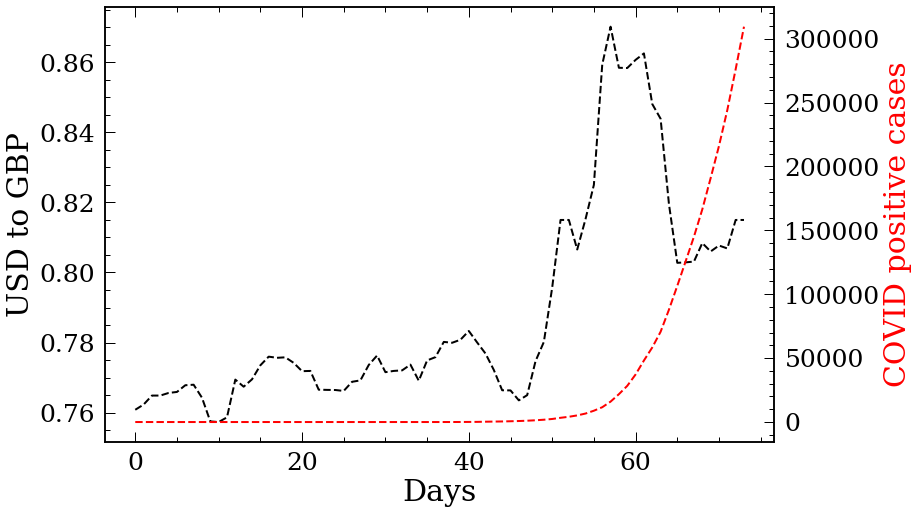

In [123]:

plt.figure(figsize=(12,8))
plt.plot(merg_df['history'],'k--')
plt.ylabel('USD to GBP')
plt.xlabel('Days')

ax2=plt.twinx()
ax2.plot(merg_df['positive'],'r--')
ax2.set_ylabel('COVID positive cases',color="r")


# stock price

We all know amazon is making more money during the covid, here's how it is related to the total number of cases in the US. Amazon and NASDAQ are both making money from covid but BA is losing money since people are not travelling as much anymore. I will also classify the companies based on what product they sell using a classifier. I would like to calculate the correlation between different stock prices and covid cases and determine what kinds of companies make/lose money over this covid.

In [130]:
amazon=pd.read_table('AMZN.csv',delimiter=',')
NASDAQ=pd.read_table('NASDAQ.csv',delimiter=',')
BA=pd.read_table('BA.csv',delimiter=',')

amazon['date']=[int(i.split('-')[0]+i.split('-')[1]+i.split('-')[2]) for i in amazon['Date']]
NASDAQ['date']=[int(i.split('-')[0]+i.split('-')[1]+i.split('-')[2]) for i in NASDAQ['Date']]
BA['date']=[int(i.split('-')[0]+i.split('-')[1]+i.split('-')[2]) for i in BA['Date']]

In [133]:
merg_df=pd.merge(amazon,covidcase,left_on='date',right_on='date',how='inner')
merg_df=pd.merge(NASDAQ,merg_df,left_on='date',right_on='date',how='inner')
merg_df=pd.merge(BA,merg_df,left_on='date',right_on='date',how='inner')

merg_df=merg_df.dropna(subset=['positive'])

merg_df

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'date',
       'Date_x', 'Open_x', 'High_x', 'Low_x', 'Close_x', 'Adj Close_x',
       'Volume_x', 'Date_y', 'Open_y', 'High_y', 'Low_y', 'Close_y',
       'Adj Close_y', 'Volume_y', 'states', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dateChecked', 'death', 'hospitalized', 'lastModified',
       'total', 'totalTestResults', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease', 'hash'],
      dtype='object')

Text(0, 0.5, 'COVID positive cases')

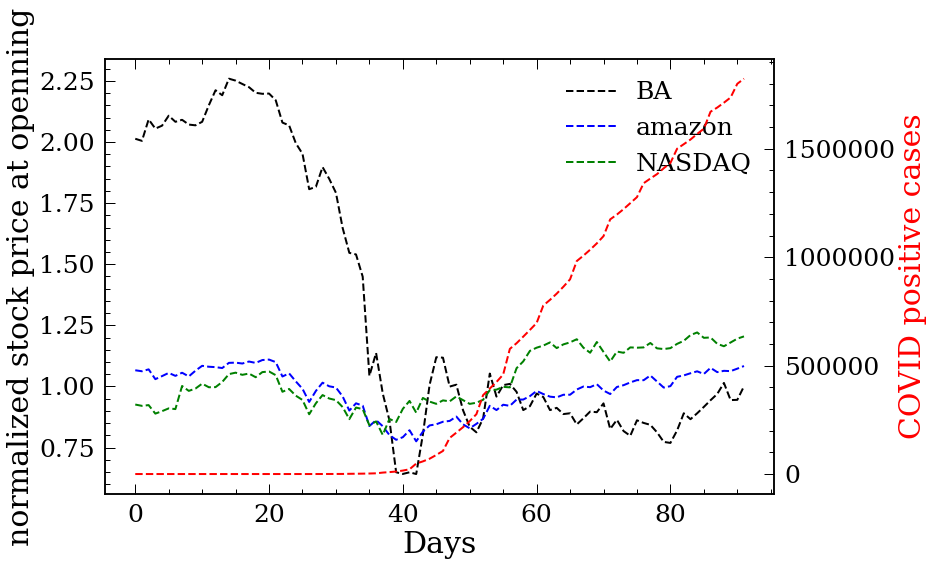

In [138]:

plt.figure(figsize=(12,8))
plt.plot(merg_df['Open']/np.median(merg_df['Open']),'k--',label='BA')
plt.plot(merg_df['Open_x']/np.median(merg_df['Open_x']),'b--',label='amazon')
plt.plot(merg_df['Open_y']/np.median(merg_df['Open_y']),'g--',label='NASDAQ')
plt.ylabel('normalized stock price at openning')
plt.xlabel('Days')
plt.legend()

ax2=plt.twinx()
ax2.plot(merg_df['positive'],'r--')
ax2.set_ylabel('COVID positive cases',color="r")



BA slope: -0.6267416901762878
amazon slope: 0.25659770414587335
NASDAQ slope: 0.8638704742771095


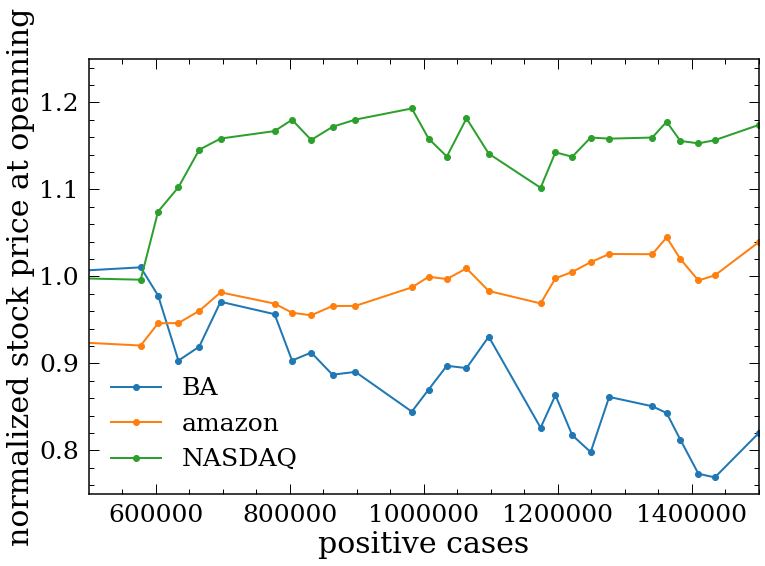

In [151]:
import scipy.stats

plt.figure(figsize=(12,8))
plt.plot(merg_df['positive'],merg_df['Open']/np.median(merg_df['Open']),'o-',label='BA')
print('BA slope:',scipy.stats.pearsonr(merg_df['positive'],merg_df['Open']/np.median(merg_df['Open']))[0])
plt.plot(merg_df['positive'],merg_df['Open_x']/np.median(merg_df['Open_x']),'o-',label='amazon')
print('amazon slope:',scipy.stats.pearsonr(merg_df['positive'],merg_df['Open_x']/np.median(merg_df['Open']))[0])
plt.plot(merg_df['positive'],merg_df['Open_y']/np.median(merg_df['Open_y']),'o-',label='NASDAQ')
print('NASDAQ slope:',scipy.stats.pearsonr(merg_df['positive'],merg_df['Open_y']/np.median(merg_df['Open']))[0])
plt.xlabel('positive cases')
plt.ylabel('normalized stock price at openning')
plt.xlim([5e5,15e5])
plt.ylim([0.75,1.25])
plt.legend()


